<a href="https://colab.research.google.com/github/saik23/DeepLearning/blob/main/Food101_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1: Classification
In this challenge, you're given a food classification dataset which has 101 classes. You need to analyze and preprocess the dataset as well as build deep learning models for performing food classification. 

You are also required to write a function to apply an augmentation as explained below: <br>
1) Take 5 random images (numpy format) as an input to the function. <br>
2) Randomly arrange the 5 images in a single image while preserving the aspect ratio of each image. <br>
3) Final image size should be an input parameter to the function. <br>
4) Output format shall be numpy format. 
(Note - If required, you can use this augmentation function while training the models). <br>

<br>
Two models are to be trained for this task, mainly light, and medium model. <br>
Examples: <br>
Light model - mobilenetv2 <br>
Medium model - Resnet50 <br>
<br>

**Main Objective**:
You are supposed to use both TensorFlow and PyTorch for this task. You need to train one model for each framework. 

## Summary 

**Create a table for your train and test accuracy as well as speed for each model (mention the framework used for training)**

## Augmentation function given in the problem statement

In [ ]:
import numpy
#def augmentation_function(input_images: List[numpy.ndarray], final_image_size: Tuple) -> numpy.ndarray:
def aug_func(imgs, mosaic_size):
    """Apply augmentation to a set of 5 images
    Args:
        input_images (List[numpy.ndarray]): List of 5 images in numpy format
        final_image_size (Tuple): A tuple of final image size in the format (width, height, channels)
    
    Returns:
        Image (numpy.ndarray): Augmented image
    """
    w, h, c = mosaic_size
    if w > h:
      min_edge = h
    else:
      min_edge = w

    mosaic = 255*np.ones((widht, heiht, channels))
    # Assuming data is from food-101 with max edge 512
    

# Analyze the dataset
## Objectives
1. Upload the dataset provided (Google Drive link). 
2. Extract the dataset. 
3. Re-arrange dataset into training and testing folders. 
4. List number of samples in training and testing folders. 
5. Plot sample images from training and testing datasets. 

In [19]:
!pip install pytorch-lightning

     |████████████████████████████████| 808kB 8.4MB/s 
     |████████████████████████████████| 112kB 27.2MB/s 
     |████████████████████████████████| 10.6MB 19.8MB/s 
     |████████████████████████████████| 829kB 49.5MB/s 
     |████████████████████████████████| 276kB 48.6MB/s 
     |████████████████████████████████| 645kB 47.2MB/s 
     |████████████████████████████████| 1.3MB 44.9MB/s 
     |████████████████████████████████| 143kB 50.9MB/s 
     |████████████████████████████████| 296kB 49.9MB/s 
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491070 sha256=8bf484a48b986f4a2023e8a70ed0bf4d0062122d6121b55af9be0116579552be
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
ERROR: tensorflow 2.5.0 has requirement tensorboard~=2.5, but you'll have tensorboard 2.4.1 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Succ

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


In [1]:
# imports

import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import cv2
import os
import random
import collections
from collections import defaultdict
import numpy as np

from tqdm import tqdm
from shutil import copy
from shutil import copytree, rmtree

import matplotlib.pyplot as plt
import matplotlib.image as img

import pytorch_lightning as pl

ModuleNotFoundError: ignored

In [7]:
# Extract the dataset
!ls '/content/drive/MyDrive/Datasets/'
!unzip '/content/drive/MyDrive/Datasets/food-101.zip'

Streaming output truncated to the last 5000 lines.
  inflating: food-101/images/tacos/1058697.jpg  
  inflating: food-101/images/tacos/1059239.jpg  
  inflating: food-101/images/tacos/1059326.jpg  
  inflating: food-101/images/tacos/1066762.jpg  
  inflating: food-101/images/tacos/1070967.jpg  
  inflating: food-101/images/tacos/1073468.jpg  
  inflating: food-101/images/tacos/1075296.jpg  
  inflating: food-101/images/tacos/1085243.jpg  
  inflating: food-101/images/tacos/108529.jpg  
  inflating: food-101/images/tacos/1086014.jpg  
  inflating: food-101/images/tacos/108945.jpg  
  inflating: food-101/images/tacos/1089575.jpg  
  inflating: food-101/images/tacos/1091159.jpg  
  inflating: food-101/images/tacos/1101369.jpg  
  inflating: food-101/images/tacos/1109058.jpg  
  inflating: food-101/images/tacos/1109744.jpg  
  inflating: food-101/images/tacos/1119371.jpg  
  inflating: food-101/images/tacos/1123766.jpg  
  inflating: food-101/images/tacos/1124625.jpg  
  inflating: food-10

**Re-arranging dataset into folders**

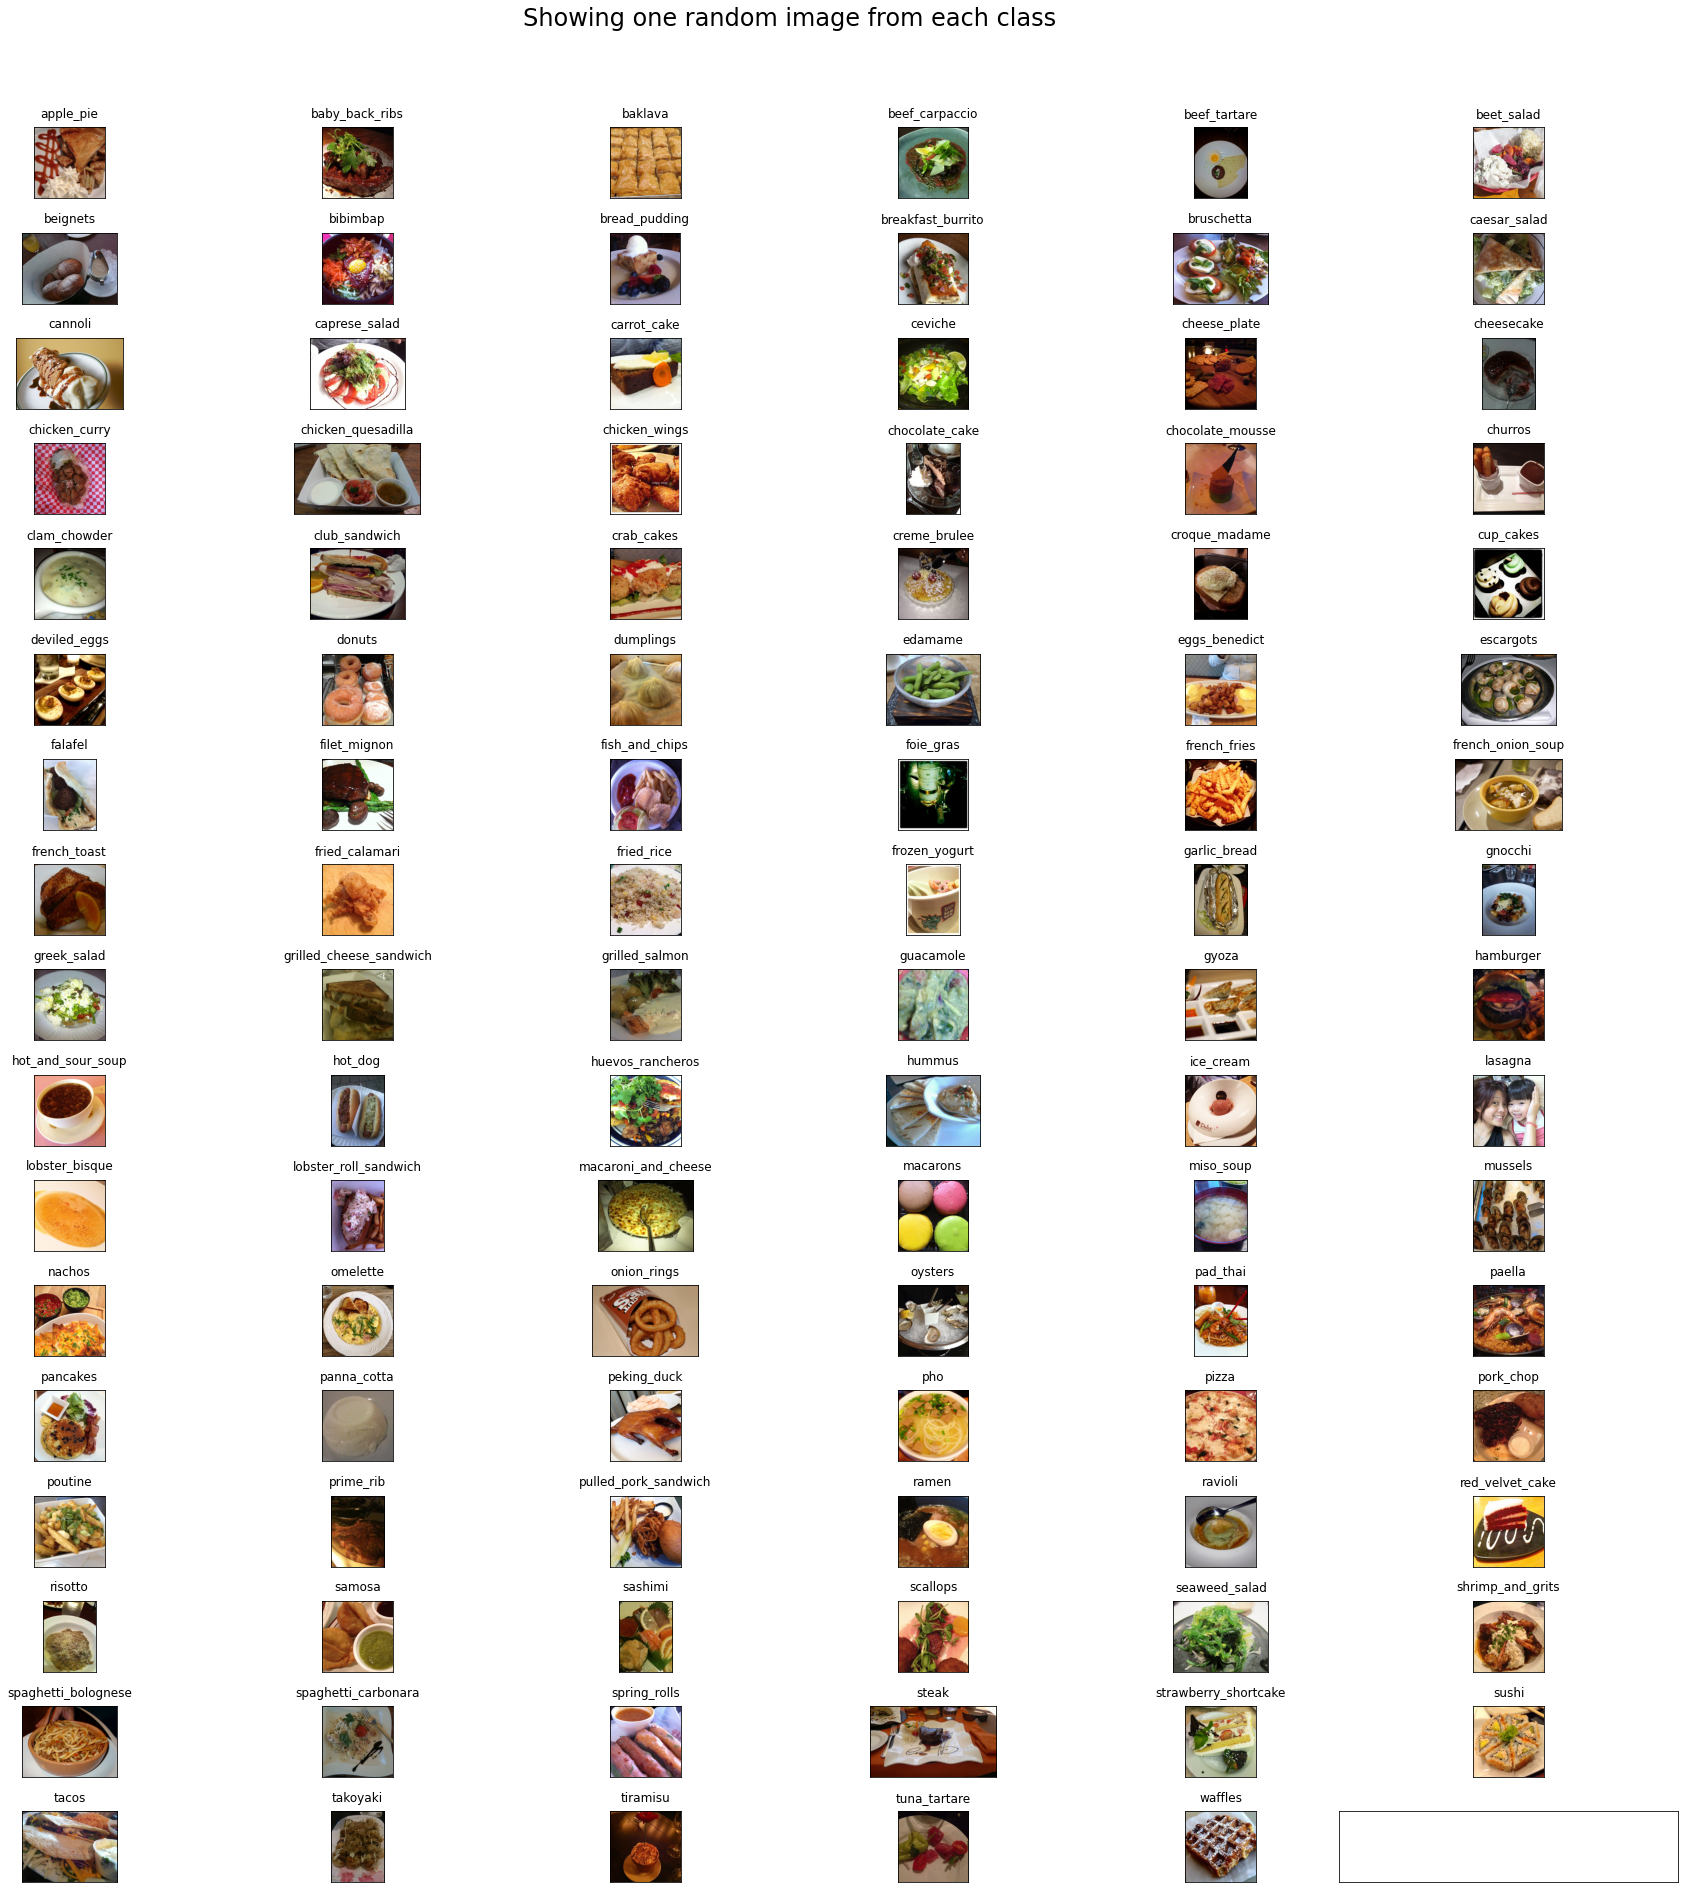

In [8]:
# Function to re-arrange the dataset

# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 6
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()
# https://matplotlib.org/users/tight_layout_guide.html

In [9]:
# Function to split data to train and test folders using meta info
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [14]:
# create training data
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
print("Creating train data...")
prepare_data('food-101/meta/train.txt', 'food-101/images', 'food-101/train')

Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying im

In [15]:
train_files = sum([len(files) for i, j, files in os.walk("food-101/train")])
print("Total number of samples in train folder")
print(train_files)

Total number of samples in train folder
Total number of samples in train folder
75750


In [16]:
# create testing data
print("Creating test data...")
prepare_data('food-101/meta/test.txt', 'food-101/images', 'food-101/test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images into  creme_brulee

Copying ima

In [21]:
test_files = sum([len(files) for i, j, files in os.walk("food-101/test")])
print("Total number of samples in test folder")
print(test_files)

Total number of samples in test folder
25250


# Pre-process Images
## Objectives
1. Implement preprocessing codes for each model. 
2. Augment the dataset. 
3. Preview the preprocessed dataset. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


### Preprocessing steps for light model


In [23]:
train_transforms = torchvision.transforms.Compose([
        torchvision.transforms.ColorJitter(brightness=0.1,contrast=0.1,saturation=0.1),
        torchvision.transforms.RandomAffine(15),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation(15),
        torchvision.transforms.Resize((224,224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])
valid_transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize((224, 224)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
])
train_dataset = torchvision.datasets.ImageFolder('food-101/train/',transform=train_transforms)
valid_dataset = torchvision.datasets.ImageFolder('food-101/test/',transform=valid_transforms)


# batchsize
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size,shuffle=True,num_workers=4,pin_memory=True)
valid_loader = torch.utils.data.DataLoader(valid_dataset,batch_size,shuffle=False,num_workers=4,pin_memory=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [25]:
# visualise data
def visualize_images(dataloader):
    mean=np.array([0.485, 0.456, 0.406])
    std=np.array([0.229, 0.224, 0.225])
    figure, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 14))
    classes = list(dataloader.dataset.class_to_idx.keys())
    img_no = 0
    for images,labels in dataloader:
        for i in range(3):
            for j in range(3):
                img = np.array(images[img_no]).transpose(1,2,0)
                lbl = labels[img_no]

                ax[i,j].imshow((img*std) + mean)
                ax[i,j].set_title(classes[lbl])
                ax[i,j].set_axis_off()
                img_no+=1
        break

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integ

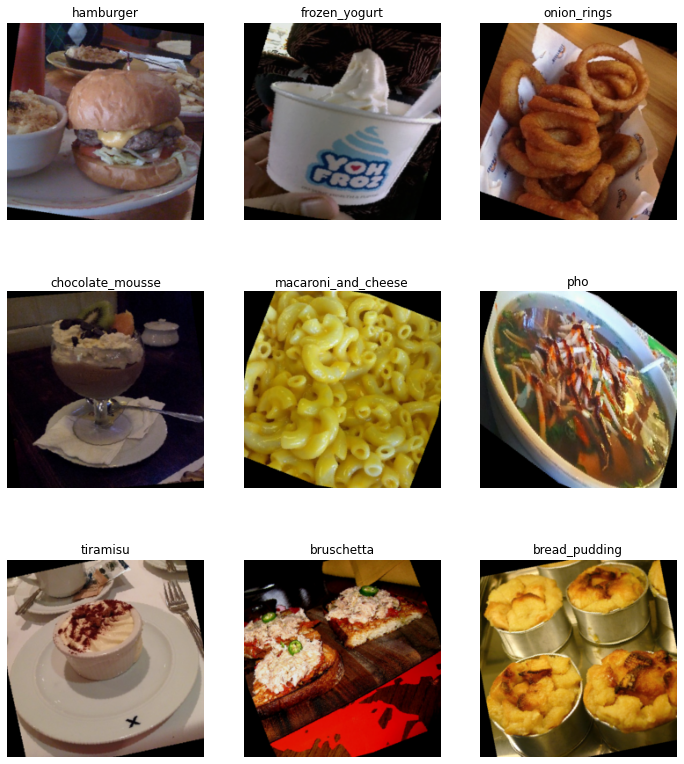

In [26]:
# vis train data
visualize_images(train_loader)

### Preprocessing steps for medium model

# Training different models
## Objectives
1. Obtain 90% accuracy in all the models trained. 
2. You're free to use any techniques for traning such as transfer learning, knowledge transfer, etc. 
3. The models should not overfit the training dataset. 
4. Measure the performance in terms of accuracy and speed of each model. 
5. Visualize the training and testing performance using TensorBoard. 

#### Optional:
1. Apply weight quantization to increase the speed of the models. 

### Your Response/Notes

You can summarize your work for this section here/give any explanations if required. 


## Train Light model

In [ ]:
# model file

model = torch.hub.load('pytorch/vision:v0.9.0', 'mobilenet_v2', pretrained=True)

# freeze the whole network
for param in model.parameters():
    param.requires_grad = False

# replace the classifier with new classifier for food-101
from collections import OrderedDict
classifier = nn.Sequential(OrderedDict([
                          ('fc1', nn.Linear(1024, 500)),
                          ('relu', nn.ReLU()),
                          ('fc2', nn.Linear(500, 101))
                          ]))
    
model.classifier = classifier

# print the model
model

In [40]:
# train loop

cuda = torch.cuda.is_available()
optimizer = torch.optim.Adam(model.parameters(),lr=4e-4,weight_decay=0.001)
criterion = torch.nn.CrossEntropyLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1,patience=2,verbose=True)

writer = SummaryWriter() # For Tensorboard
early_stop_count=0
ES_patience=5
best = 0.0

if cuda:
    model.cuda()

epochs = 2
for epoch in range(epochs):
    # Training
    model.train()
    correct = 0
    train_loss = 0.0
    tbar = tqdm(train_loader, desc = 'Training', position=0, leave=True)
    for i,(inp,lbl) in enumerate(tbar):
        optimizer.zero_grad()
        if cuda:
            inp,lbl = inp.cuda(),lbl.cuda()

        out = model(inp)
        loss = criterion(out,lbl)
        train_loss += loss
        out = out.argmax(dim=1)
        correct += (out == lbl).sum().item()
        loss.backward()
        optimizer.step()
        tbar.set_description(f"Epoch: {epoch+1}, loss: {loss.item():.5f}, acc: {100.0*correct/((i+1)*train_loader.batch_size):.4f}%")
    train_acc = 100.0*correct/len(train_loader.dataset)
    train_loss /= (len(train_loader.dataset)/batch_size)
    
    #Validation
    model.eval()
    with torch.no_grad():
        correct = 0
        val_loss = 0.0
        vbar = tqdm(valid_loader, desc = 'Validation', position=0, leave=True)
        for i,(inp,lbl) in enumerate(vbar):
            if cuda:
                inp,lbl = inp.cuda(),lbl.cuda()
            out = model(inp)
            val_loss += criterion(out,lbl)
            out = out.argmax(dim=1)
            correct += (out == lbl).sum().item()
        val_acc = 100.0*correct/len(valid_loader.dataset)
        val_loss /= (len(valid_loader.dataset)/batch_size)
  
    print(f'\nEpoch: {epoch+1}/{epochs}')
    print(f'Train loss: {train_loss}, Train Accuracy: {train_acc}')
    print(f'Validation loss: {val_loss}, Validation Accuracy: {val_acc}\n')

    scheduler.step(val_loss)

    # write to tensorboard
    writer.add_scalar("Loss/train", train_loss, epoch)
    writer.add_scalar("Loss/val", val_loss, epoch)
    writer.add_scalar("Accuracy/train", train_acc, epoch)
    writer.add_scalar("Accuracy/val", val_acc, epoch)

    if val_acc>best:
        best=val_acc
        torch.save(model,model_name)
        early_stop_count=0
        print('Accuracy Improved, model saved.\n')
    else:
        early_stop_count+=1

    if early_stop_count==ES_patience:
        print('Early Stopping Initiated...')
        print(f'Best Accuracy achieved: {best:.2f}% at epoch:{epoch+1-ES_patience}')
        print(f'Model saved as {model_name}')
        break
    writer.flush()


NameError: ignored

## Train Medium model